<a href="https://colab.research.google.com/github/routb68/jan-may-2023-prml-assignment/blob/main/assignment-1/Kernel_PCA_on_MNIST_and_Data_Recreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question**


> *1.3 Write a piece of code to implement the Kernel PCA algorithm on this dataset. Use the following kernels :*



> *a.   κ(x,y)=(1+xTy)d for d={2,3,4}*


> *b.   κ(x,y) = exp −(x−y)T (x−y) for σ = {0.1,0.2,...,1}*


> *Plot the projection of each point in the dataset onto the top-2 components for each kernel. Use one plot for each kernel and in the case of (B), use a different plot for each value of σ.*








**Importing libraries and Data downloding**

In [6]:
!python --version
import numpy as np
print("numpy version",np.version.version)
import matplotlib.pyplot as plt 
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784) 
print("x_train matrix shape", x_train.shape)
print("x_test matrix shape", x_test.shape)
np_x_train = np.array(x_train)
np_x_test = np.array(x_test)
print("np_x_train shape", np_x_train.shape)
print("np_x_train[0] datatype", np_x_train[0].dtype)
np_x_train = np_x_train.astype(np.float64)
np_x_test = np_x_test.astype(np.float64)
print("np_x_train[0] datatype", np_x_train[0].dtype)

Python 3.8.10
numpy version 1.22.4
x_train matrix shape (60000, 784)
x_test matrix shape (10000, 784)
np_x_train shape (60000, 784)
np_x_train[0] datatype uint8
np_x_train[0] datatype float64




> In actual Kernel PCA algorithm we have to calculate the matrix multiplication of 𝐗𝐗ᵀ, but due to computational constarins on google colab we will reconstruct data with 𝐗ᵀ𝐗 and we will be using X-Test data to do the same thing seperatly where we will be using 𝐗𝐗ᵀ to do all the further computations. 



In [7]:
transposearray=np.transpose(np_x_train)
print("np_x_train matrix shape",np_x_train.shape)
print("transposearray matrix shape",transposearray.shape)

np_x_train matrix shape (60000, 784)
transposearray matrix shape (784, 60000)


In [8]:
k=np.matmul(transposearray,np_x_train)

print("multiplied matrix shape",k.shape)

multiplied matrix shape (784, 784)




> Implementing Kernel PCA algorithm and we will be using this k matrix as our covariance matrix



In [9]:
for i in range(784):
    for j in range(784):
        k[i][j]+=1
for i in range(784):
    for j in range(784):
        k[i][j]=k[i][j]*k[i][j]
I=np.identity(784) 
print("Identity matrix shape",I.shape)
div=1/784
divmat=np.full((784,784), div)
print("divmat matrix shape",divmat.shape)
matminus = np.subtract(I, divmat)
print("matminus matrix shape",matminus.shape)
f=np.matmul(matminus, k)
print("f matrix shape",f.shape)
kernalcent=np.matmul(f, matminus)
print("kernalcent matrix shape",kernalcent.shape)

Identity matrix shape (784, 784)
divmat matrix shape (784, 784)
matminus matrix shape (784, 784)
f matrix shape (784, 784)
kernalcent matrix shape (784, 784)




> Computing eigen values and eigen vectors with numpy linalg.eig



In [10]:
eig_vals, eig_vecs = np.linalg.eig(kernalcent)



> Printing eigen value vector shape, eigen vector shape and 20 top eigen values of Kernel PCA 



In [15]:
print("eigen vector shape",eig_vecs.shape)
print("eigenvalues  vector shape",eig_vals.shape)
for i in range (20):
  print(f"{i+1} th eigen value is - {np.real(eig_vals[i])}")

eigen vector shape (784, 784)
eigenvalues  vector shape (784,)
1 th eigen value is - 7.772502032820558e+19
2 th eigen value is - 2.059528574951527e+19
3 th eigen value is - 1.911212367206933e+19
4 th eigen value is - 1.4116962317357505e+19
5 th eigen value is - 1.2769890592009759e+19
6 th eigen value is - 1.2119940741684361e+19
7 th eigen value is - 9.682891132073202e+18
8 th eigen value is - 9.29444912704172e+18
9 th eigen value is - 8.560493244622112e+18
10 th eigen value is - 8.014335564975702e+18
11 th eigen value is - 7.198945438290644e+18
12 th eigen value is - 6.385296564136563e+18
13 th eigen value is - 5.684763303094889e+18
14 th eigen value is - 5.428007935324488e+18
15 th eigen value is - 5.364755602663083e+18
16 th eigen value is - 5.013702683982988e+18
17 th eigen value is - 4.694007715287129e+18
18 th eigen value is - 4.506854626414781e+18
19 th eigen value is - 4.246928603843254e+18
20 th eigen value is - 4.0770813291897764e+18




> Ploting eigen vectors in image format



0


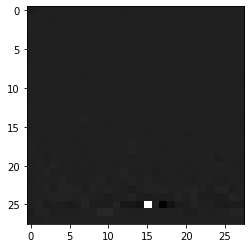

40



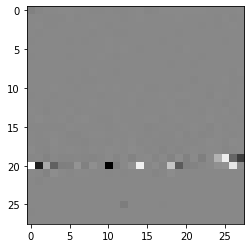

80



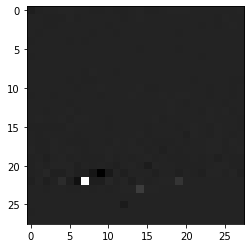

120



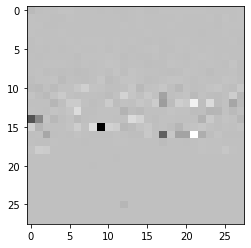

160



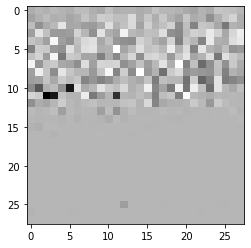

200



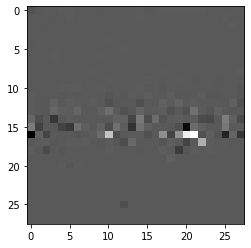

240



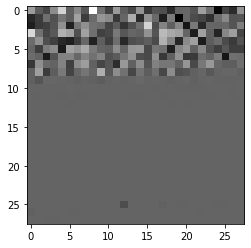

280



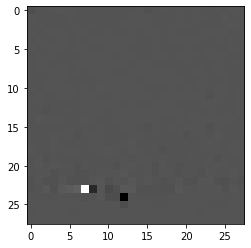

320



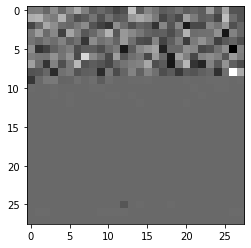

360



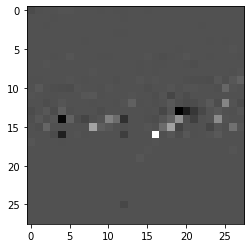

400



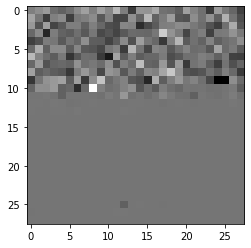

440



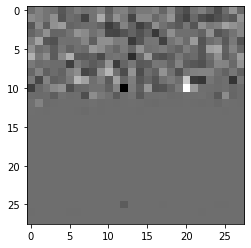

480



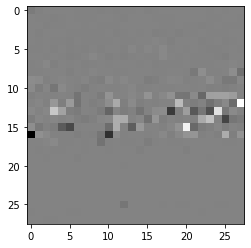

520



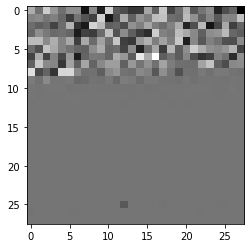

560



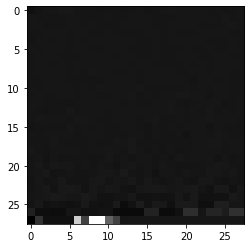

600



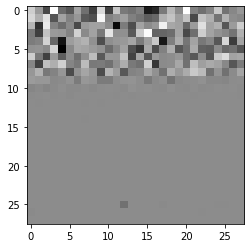

640



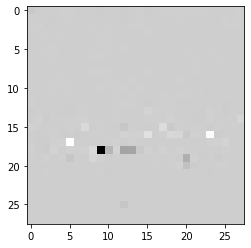

680



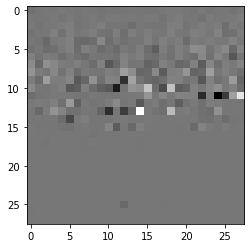

720



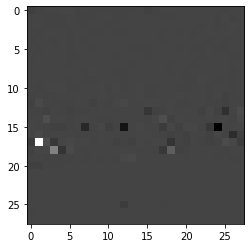

760



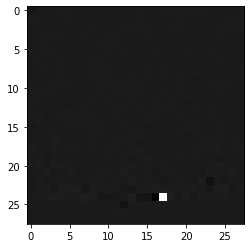

783



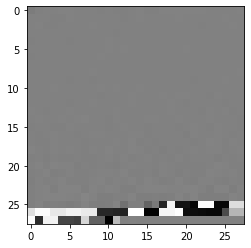

In [16]:
d = np.real(eig_vecs[0])
print(0)
plt.imshow(d.reshape(28,28), cmap='gray')
plt.show()
for i in range (1,784):
  a = np.real(eig_vecs[i] )
  d = a 
  if(i%40==0 or i==783):
    print (i)
    print()
    e=d
    e=e.reshape(28,28)
    plt.imshow(e, cmap='gray')
    plt.show()



> Reconstructing some datapoints with respect to eigen vectors



0



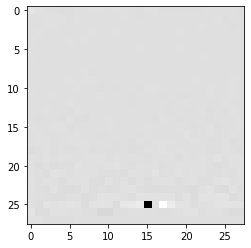

40



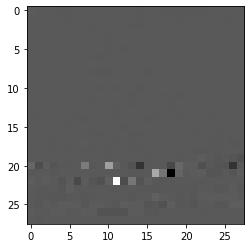

80



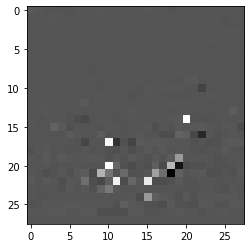

120



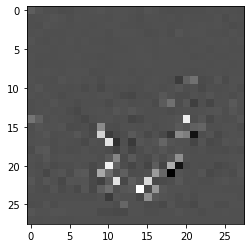

160



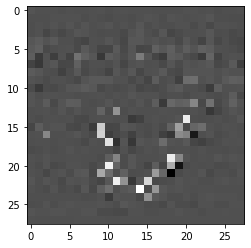

200



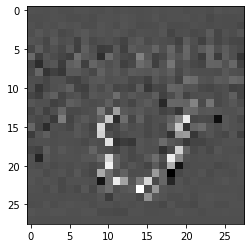

240



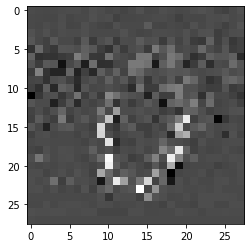

280



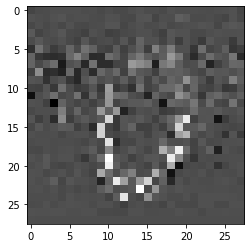

320



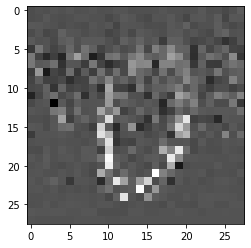

360



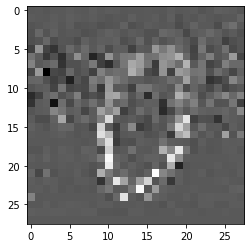

400



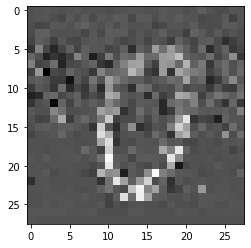

440



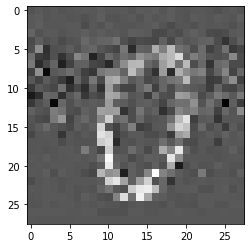

480



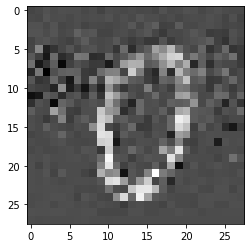

520



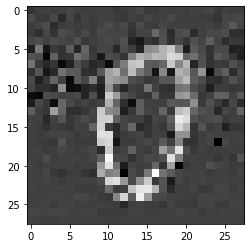

560



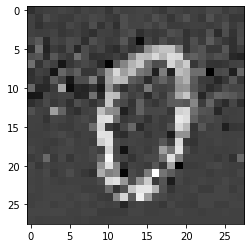

600



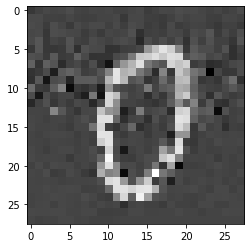

640



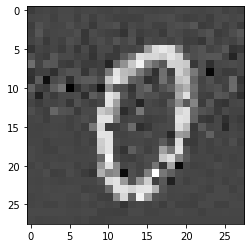

680



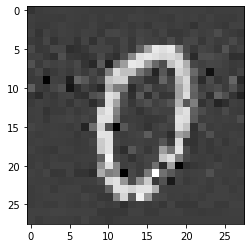

720



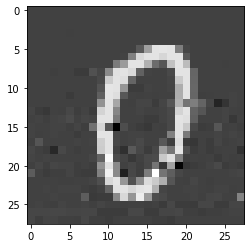

760



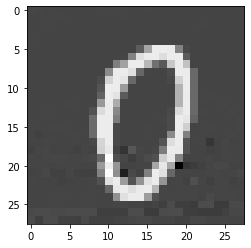

783



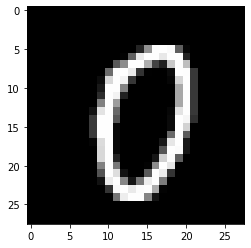

In [17]:
d = np.real(eig_vecs[0])
for i in range (784):
  a = np.real(eig_vecs[i])
  b = np_x_train[1000]
  c = np.matmul(b.T,a)
  if(i==0):
    d = a*c
  else:
    d = (d+(a*c))
  if(i%40==0 or i==783):
    print (i)
    print()
    e = d
    e=e.reshape(28,28)
    plt.imshow(e, cmap='gray')
    plt.show()

0



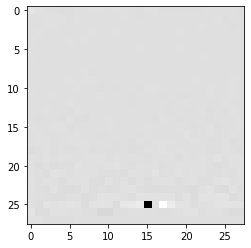

40



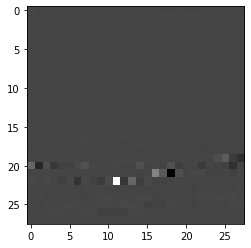

80



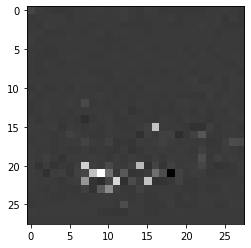

120



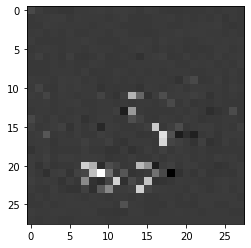

160



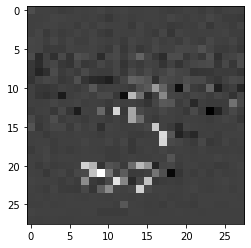

200



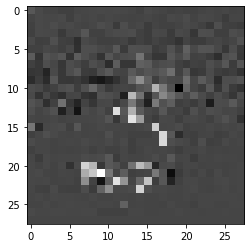

240



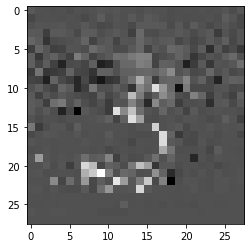

280



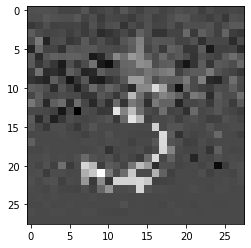

320



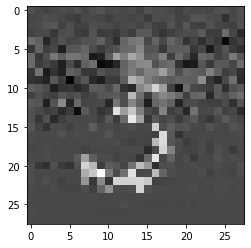

360



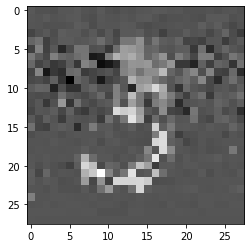

400



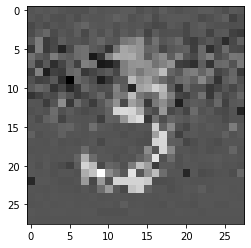

440



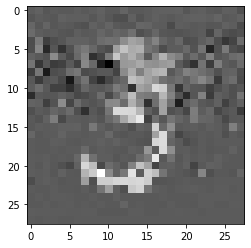

480



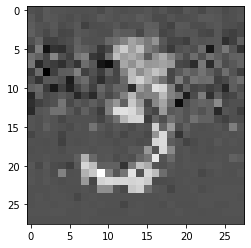

520



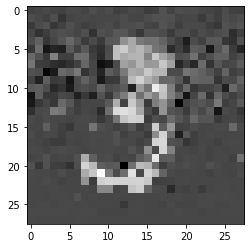

560



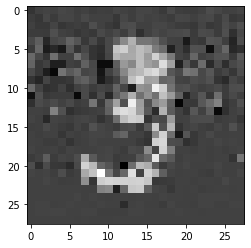

600



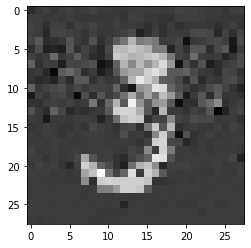

640



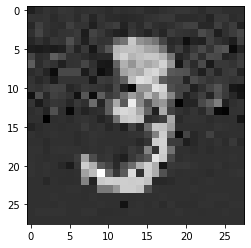

680



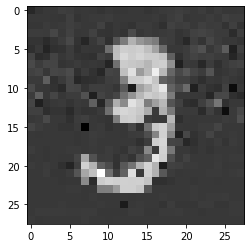

720



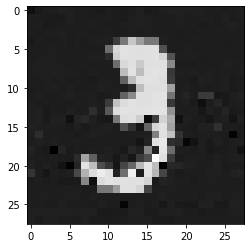

760



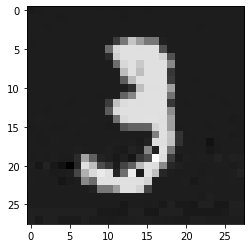

783



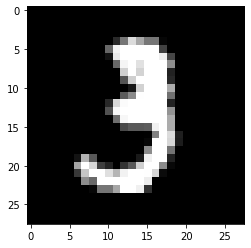

In [18]:
d = np.real(eig_vecs[0])
for i in range (784):
  a = np.real(eig_vecs[i])
  b = np_x_train[10]
  c = np.matmul(b.T,a)
  if(i==0):
    d = a*c
  else:
    d = (d+(a*c))
  if(i%40==0 or i==783):
    print (i)
    print()
    e = d
    e=e.reshape(28,28)
    plt.imshow(e, cmap='gray')
    plt.show()

0



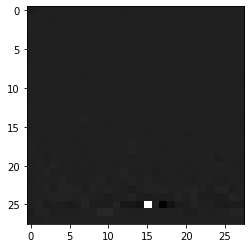

40



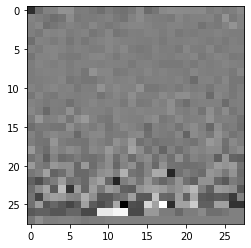

80



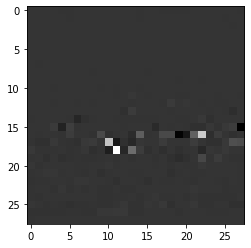

120



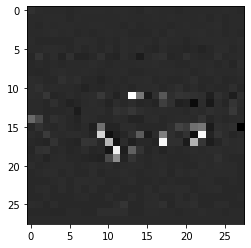

160



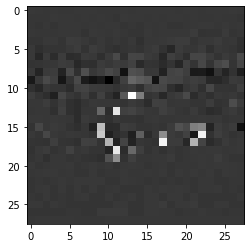

200



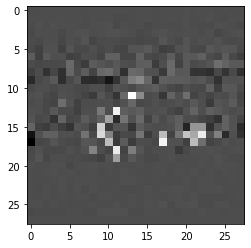

240



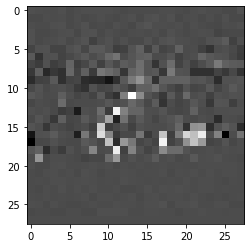

280



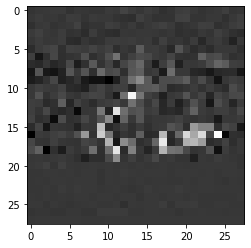

320



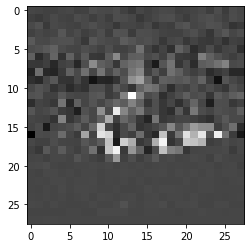

360



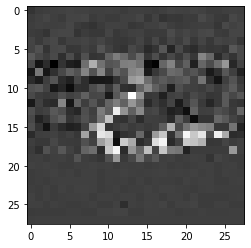

400



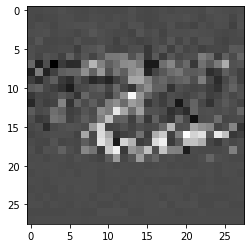

440



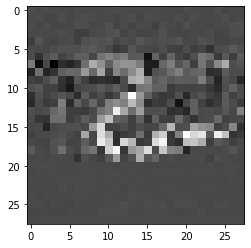

480



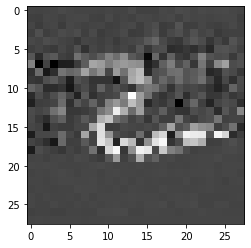

520



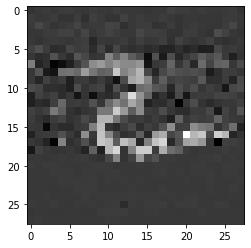

560



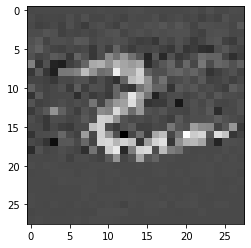

600



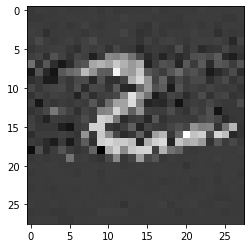

640



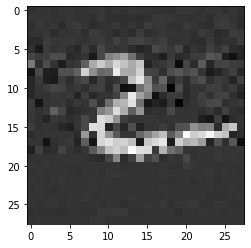

680



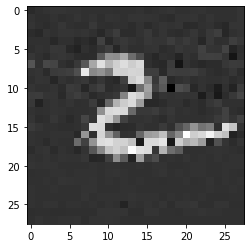

720



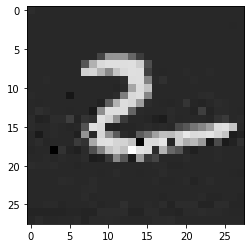

760



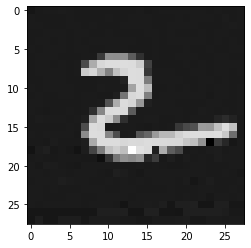

783



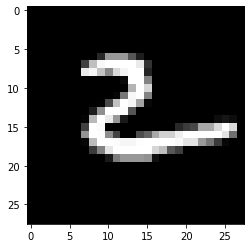

In [19]:
d = np.real(eig_vecs[0])
for i in range (784):
  a = np.real(eig_vecs[i])
  b = np_x_train[109]
  c = np.matmul(b.T,a)
  if(i==0):
    d = a*c
  else:
    d = (d+(a*c))
  if(i%40==0 or i==783):
    print (i)
    print()
    e = d
    e=e.reshape(28,28)
    plt.imshow(e, cmap='gray')
    plt.show()

0



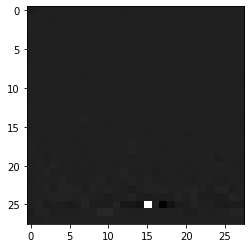

40



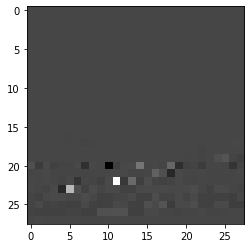

80



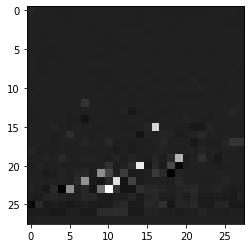

120



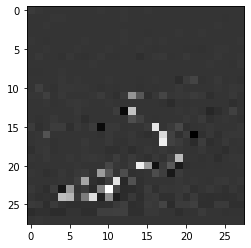

160



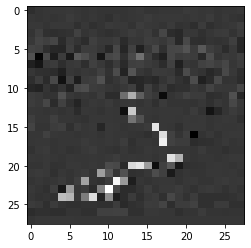

200



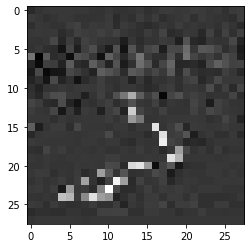

240



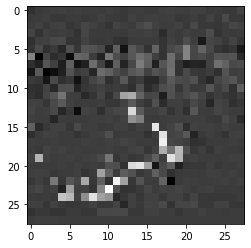

280



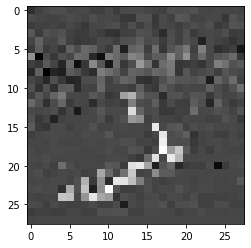

320



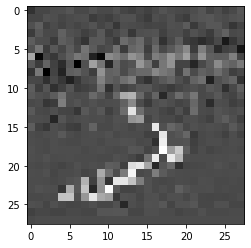

360



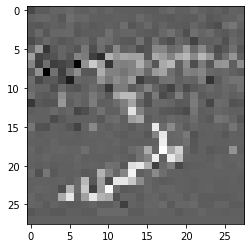

400



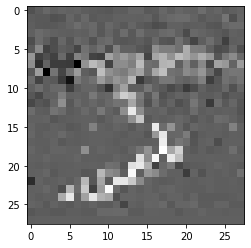

440



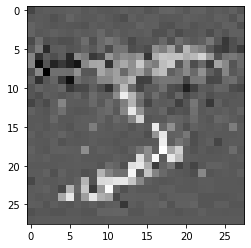

480



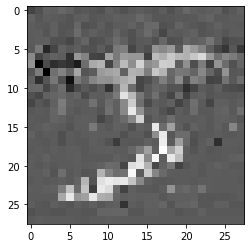

520



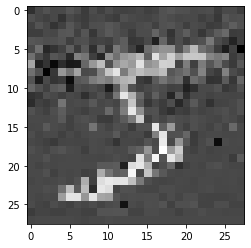

560



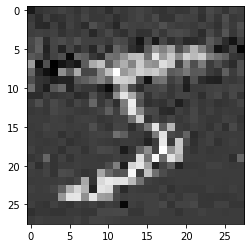

600



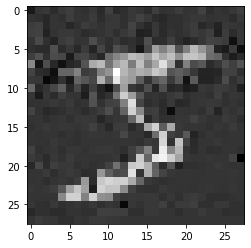

640



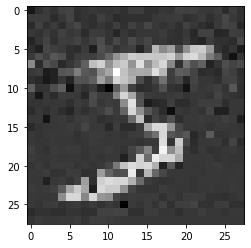

680



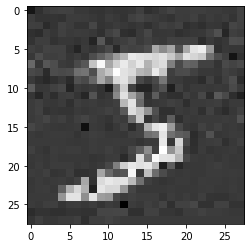

720



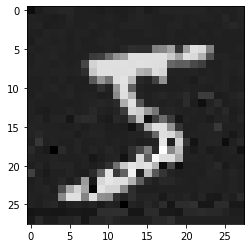

760



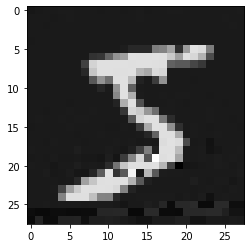

783



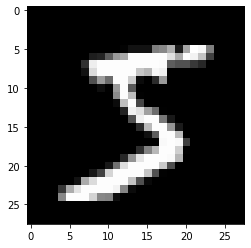

In [20]:
d = np.real(eig_vecs[0])
for i in range (784):
  a = np.real(eig_vecs[i])
  b = np_x_train[0]
  c = np.matmul(b.T,a)
  if(i==0):
    d = a*c
  else:
    d = (d+(a*c))
  if(i%40==0 or i==783):
    print (i)
    print()
    e = d
    e=e.reshape(28,28)
    plt.imshow(e, cmap='gray')
    plt.show()



> Now ploting the projection of each point in the dataset onto the top-2 components for each kernel



In [25]:
variance = 0
for i in range (784):
  variance = ( variance + np.real(eig_vals[i]))
print("Total variance equal to  ",variance)
var95 = 0
dimension = 0
for i in range (784):
  var95 = (var95 + np.real(eig_vals[i]))
  if(var95 >= (0.95 * variance)):
    dimension = i
    break;
print("95% variance is equal to  ",var95)
print("chaecking ratio of var95/total variance  ",var95/variance)
print("number of dimensions requred to capture 95% variance  ",dimension)
a = 0
a = a + np.real(eig_vals[0])
a = a + np.real(eig_vals[1])
print("Top 2 directions cumulative variance is equal to  ",a)
print("Top 2 directions cumulative % variance is equal to  ",100*(a/variance))

Total variance equal to   3.713240703226348e+20
95% variance is equal to   3.527624364414331e+20
chaecking ratio of var95/total variance   0.9500123063256473
number of dimensions requred to capture 95% variance   130
Top 2 directions cumulative variance is equal to   9.832030607772085e+19
Top 2 directions cumulative % variance is equal to   26.478301283375632


Recreating data set with 2 eigen vectors corresponding to top-2 eigen values and assigning lebel to 3rd dimensions for better visualizations while ploting

In [26]:
recreate = np.empty([60000,3])
for i in range (60000):
  recreate[i][0] = np.matmul(np.real(eig_vecs[0]),np_x_train[i])
  recreate[i][1] = np.matmul(np.real(eig_vecs[1]),np_x_train[i])
  recreate[i][2] = y_train[i]

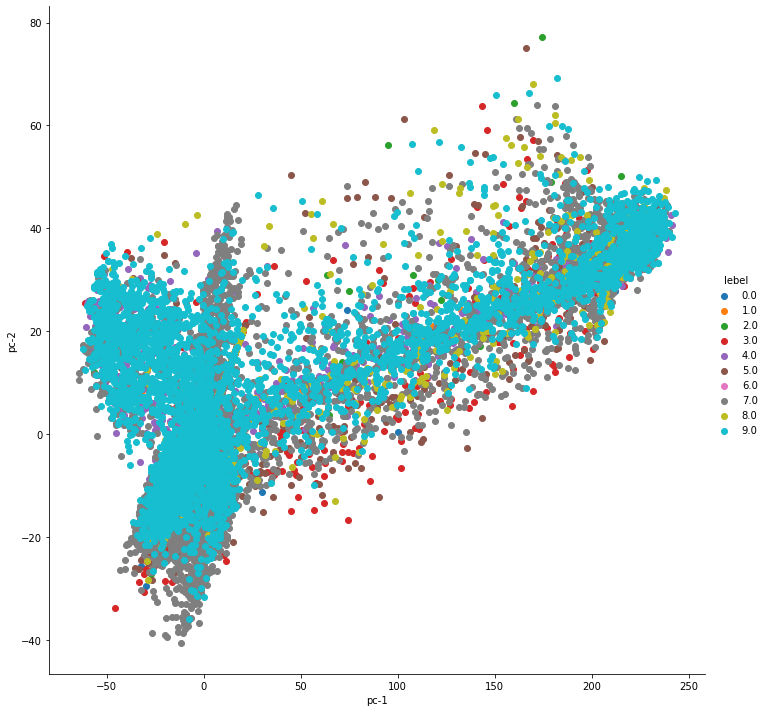

In [27]:
import pandas as pd
df = pd.DataFrame(recreate, columns = ['pc-1','pc-2','lebel'])
#print(df)
import seaborn as sns
grid = sns.FacetGrid(df, hue="lebel", height=10)
grid.map(plt.scatter, "pc-1", "pc-2").add_legend()